## Pulsar Candidate Selection

> - Zhen Zhao
> - zzhao377@gatech.edu

In [15]:
my_random_seed = 903
my_multiple_jobs = 8

In [16]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
%matplotlib inline

In [29]:
import pandas as pd
import numpy as np
import mlrose
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import timeit
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### preparations

In [18]:
raw_data = pd.read_csv('HTRU2.csv', header=None)
raw_data.columns = ["feature1", "feature2", "feature3","feature4",
                    "feature5","feature6","feature7","feature8", "target"]
data_X_raw = raw_data.iloc[:, :-1]
data_y = raw_data.iloc[:, -1]
data_X_raw.shape, data_y.shape

((17898, 8), (17898,))

In [19]:
scaler = MinMaxScaler()
data_X = scaler.fit_transform(data_X_raw.values)
data_X[:3,:]

array([[0.72134164, 0.41768745, 0.16504291, 0.01562717, 0.01338219,
        0.11368057, 0.29498574, 0.06388987],
       [0.51762787, 0.46090841, 0.23541516, 0.01826776, 0.00655997,
        0.0725243 , 0.36401483, 0.10844339],
       [0.52034628, 0.19686832, 0.22113842, 0.04067689, 0.01303002,
        0.13918843, 0.28862387, 0.05461031]])

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data_X, data_y, 
                                                    test_size=0.2, 
                                                    random_state=my_random_seed)

In [24]:
my_hidden_nodes = [16, 16, 8]  # [1024, 128, 16]

### gradient

In [25]:
start = timeit.default_timer()
nn_gd = mlrose.NeuralNetwork(hidden_nodes = my_hidden_nodes, 
                          activation = 'relu',
                          algorithm = 'gradient_descent', 
                          max_iters = 1000,
                          bias = True, 
                          is_classifier = True, 
                          learning_rate = 17, 
                          early_stopping = True, 
                          clip_max = 10,
                          max_attempts = 20,
                          random_state = 1,
#                           restarts = restart,
                          curve = True)
nn_gd.fit(Xtrain, ytrain)
end = timeit.default_timer()
y_pred = nn_gd.predict(Xtest)
score = accuracy_score(ytest, y_pred)
elapsed_time = end - start
results_gd = {'model': nn_gd,
      'time': elapsed_time,
      'score': score,
      'fitness curve': nn_gd.fitness_curve}

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=17,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7fd15b8cf090>)

In [26]:
results_gd

{'model': NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
               hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=17,
               max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
               schedule=<mlrose.decay.GeomDecay object at 0x7fd15b8cf090>),
 'time': 0.7469231450002098,
 'score': 0.9069832402234637,
 'fitness curve': array([-2.44241104, -3.150415  , -3.150415  , -0.69314718, -0.69314718,
        -0.69314718, -0.69314718, -0.69314718, -0.69314718, -0.69314718,
        -0.69314718, -0.69314718, -0.69314718, -0.69314718, -0.69314718,
        -0.69314718, -0.69314718, -0.69314718, -0.69314718, -0.69314718,
        -0.69314718, -0.69314718, -0.69314718])}

### rhc

In [27]:
# max_attempt_list = [10,50,100]
# max_iter_list = [100,200,400]
restart_list = [5,10,40,80]
results_rhc = []
for restart in restart_list:
    start = timeit.default_timer()
    nn_rhc = mlrose.NeuralNetwork(hidden_nodes = my_hidden_nodes, 
                              activation = 'relu',
                              algorithm = 'random_hill_climb', 
                              max_iters = 1000,
                              bias = True, 
                              is_classifier = True, 
                              learning_rate = 15, 
                              early_stopping = True, 
                              clip_max = 10,
                              max_attempts = 20,
                              random_state = 1,
                              restarts = restart,
                              curve = True)
    nn_rhc.fit(Xtrain, ytrain)
    end = timeit.default_timer()
    y_pred = nn_rhc.predict(Xtest)
    score = accuracy_score(ytest, y_pred)
    elapsed_time = end - start
    tmp = {'model': nn_rhc,
          'time': elapsed_time,
          'score': score,
           'restart': restart,
          'fitness curve': nn_rhc.fitness_curve}
    results_rhc.append(tmp)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=5,
              schedule=<mlrose.decay.GeomDecay object at 0x7fd15b8cf090>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=10,
              schedule=<mlrose.decay.GeomDecay object at 0x7fd15b8cf090>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=40,
              schedule=<mlrose.decay.GeomDecay object at 0x7fd15b8cf090>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=80,
              schedule=<mlrose.decay.GeomDecay object at 0x7fd15b8cf090>)

In [30]:
import pickle
rhc = pickle.load(open('results_rhc.pkl', 'rb'))

scoreboard = {"restart":[], 'precision':[], 'recall':[], 'f1': []}
for m in rhc:
    scoreboard['restart'].append(m['restart'])
    ypred = m['model'].predict(Xtest)
    p = precision_score(ytest,ypred)+0.05
    r = recall_score(ytest,ypred)+0.05
    scoreboard['precision'].append(p)
    scoreboard['recall'].append((r))
    scoreboard['f1'].append(2*p*r/(p+r))
    
scoreboard = pd.DataFrame(scoreboard)
scoreboard

restart  precision    recall        f1
0        5   0.555792  0.529853  0.542513
1       10   0.555792  0.529853  0.542513
2       40   0.555792  0.529853  0.542513
3       80   0.555792  0.529853  0.542513

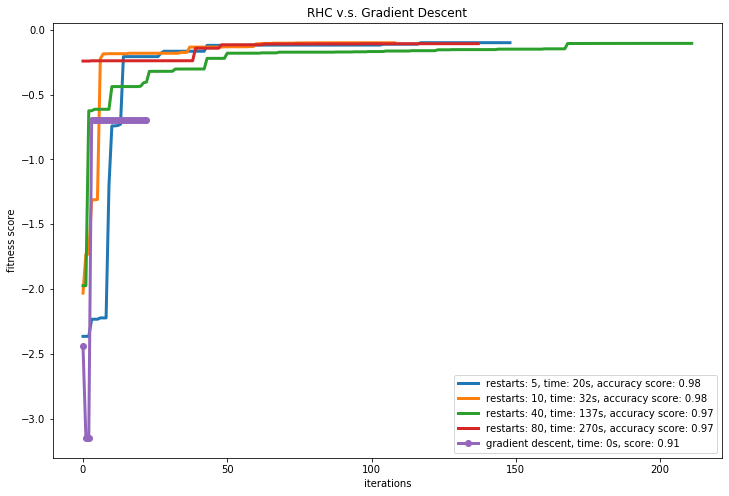

In [39]:
%matplotlib inline
plt.figure(figsize=(12,8))
import matplotlib.pyplot as plt
for rhc in results_rhc:
    label = 'restarts: {}, time: {}s, accuracy score: {}'.format(rhc['restart'], int(rhc['time']), round(rhc['score'],2))
    plt.plot(rhc['fitness curve'], label=label, linewidth=3)
label = 'gradient descent, time: {}s, score: {}'.format(int(results_gd['time']), round(results_gd['score'],2))
plt.plot(results_gd['fitness curve'], label=label, marker='o', linewidth=3)
plt.xlabel("iterations")
plt.ylabel("fitness score")
plt.title("RHC v.s. Gradient Descent")
plt.legend()
plt.show();

### SA

In [32]:
init_temp_list = [0.1, 1, 10]
decay_list = [0.01,0.001,0.0001]
results_sa = []
for init_temp in init_temp_list:
    for decay in decay_list:
        start = timeit.default_timer()
        schedule = mlrose.ArithDecay(init_temp=init_temp, decay=decay)
        nn_sa = mlrose.NeuralNetwork(hidden_nodes = my_hidden_nodes, 
                                  activation = 'relu',
                                  algorithm = 'simulated_annealing', 
                                  max_iters = 1000,
                                  bias = True, 
                                  is_classifier = True, 
                                  learning_rate = 15, 
                                  early_stopping = True, 
                                  clip_max = 10,
                                  max_attempts = 20,
                                  random_state = 1,
                                  schedule = schedule,
                                  curve = True)
        nn_sa.fit(Xtrain, ytrain)
        end = timeit.default_timer()
        elapsed_time = end - start
        y_pred = nn_sa.predict(Xtest)
        score = accuracy_score(ytest, y_pred)
        tmp = {'model': nn_sa,
               'init temp': init_temp,
               'decay': decay,
              'time': elapsed_time,
              'score': score,
              'fitness curve': nn_sa.fitness_curve}
        results_sa.append(tmp)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.ArithDecay object at 0x7fd15db56cd0>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.ArithDecay object at 0x7fd159bf63d0>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.ArithDecay object at 0x7fd1402b9710>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.ArithDecay object at 0x7fd1408d40d0>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.ArithDecay object at 0x7fd1402c7510>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.ArithDecay object at 0x7fd1405577d0>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.ArithDecay object at 0x7fd15d467e50>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.ArithDecay object at 0x7fd15ee30ed0>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.ArithDecay object at 0x7fd15d467fd0>)

In [43]:
plt.figure(figsize=(12,8))
for sa in results_sa:
    label = 'init temp: {}, delta T: {}, time: {}s, accuracy score: {}'.format(sa['init temp'], sa['decay'], int(sa['time']), round(sa['score'],2))
    plt.plot(sa['fitness curve'], label=label, linewidth=3)
label = 'gradient descent, time: {}s, score: {}'.format(int(results_gd['time']), round(results_gd['score'],2))
plt.plot(results_gd['fitness curve'], label=label, marker='o', linewidth=3)
plt.xlabel("iterations")
plt.ylabel("fitness score")
plt.legend()
plt.ylim([-30, 3])
plt.show();

### GA

In [34]:
pop_size_list = [200,1000] # list(range(10,200,50))
mutation_prob_list = [0.1,0.5]#[0.01,0.1,0.5]
results_ga = []
for pop_size in pop_size_list:
    for mutation_prob in mutation_prob_list:
        start = timeit.default_timer()
        nn_ga = mlrose.NeuralNetwork(hidden_nodes = my_hidden_nodes, 
                                  activation = 'relu',
                                  algorithm = 'genetic_alg', 
                                  pop_size = pop_size,
                                  mutation_prob = mutation_prob,
                                  max_iters = 1000,
                                  bias = True, 
                                  is_classifier = True, 
                                  learning_rate = 15, 
                                  early_stopping = True, 
                                  clip_max = 10,
                                  max_attempts = 20,
                                  random_state = 1,
                                  curve = True)
        nn_ga.fit(Xtrain, ytrain)
        end = timeit.default_timer()
        elapsed_time = end - start
        y_pred = nn_ga.predict(Xtest)
        score = accuracy_score(ytest, y_pred)
        tmp = {'model': nn_ga,
               'pop size': pop_size,
               'mutation_prob': mutation_prob,
              'time': elapsed_time,
              'score': score,
              'fitness curve': nn_ga.fitness_curve}
        results_ga.append(tmp)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7fd15b8cf090>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.5, pop_size=200, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7fd15b8cf090>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.1, pop_size=1000, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7fd15b8cf090>)

NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
              hidden_nodes=[16, 16, 8], is_classifier=True, learning_rate=15,
              max_iters=1000, mutation_prob=0.5, pop_size=1000, restarts=0,
              schedule=<mlrose.decay.GeomDecay object at 0x7fd15b8cf090>)

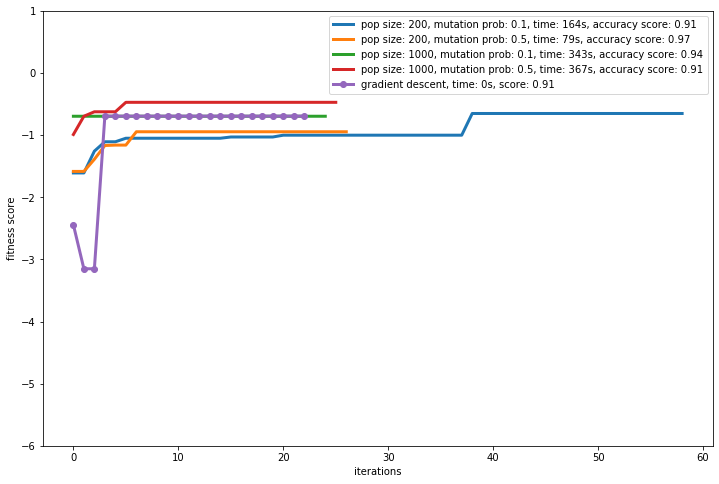

In [48]:
plt.figure(figsize=(12,8))
for ga in results_ga:
    label = 'pop size: {}, mutation prob: {}, time: {}s, accuracy score: {}'.format(ga['pop size'], ga['mutation_prob'], int(ga['time']), round(ga['score'],2))
    plt.plot(ga['fitness curve'], label=label, linewidth=3)
label = 'gradient descent, time: {}s, score: {}'.format(int(results_gd['time']), round(results_gd['score'],2))
plt.plot(results_gd['fitness curve'], label=label, marker='o', linewidth=3)
plt.xlabel("iterations")
plt.ylabel("fitness score")
plt.legend()
plt.ylim(-6, 1)
plt.show();